# Getting Satellite Images Into Your Notebook

This tutorial assumes you are familiar with the workings of Jupyter Notebooks. If not, then please go to our quick tutorial [on Jupyter Notebooks](https://notebooks.geobigdata.io/hub/notebooks/5b1d8a7303cc425f56bc54d2) to get you up to speed. If you already understand multi-spectral imagery you can skip directly to the [terminology section](#terminology). 


## Quick Introduction to Satellite Images

Most of you have probably worked with digital images before, either from your phone or a digital camera. Since satellite images share some similarities with digital camera images, let's do a quick review.

Your digital camera has a sensor inside of it. That sensor captures light reflected of the objects in front of it. While light is a continuous spectrum of wavelengths (see image below) cameras divide this continuous spectrum into discrete groups
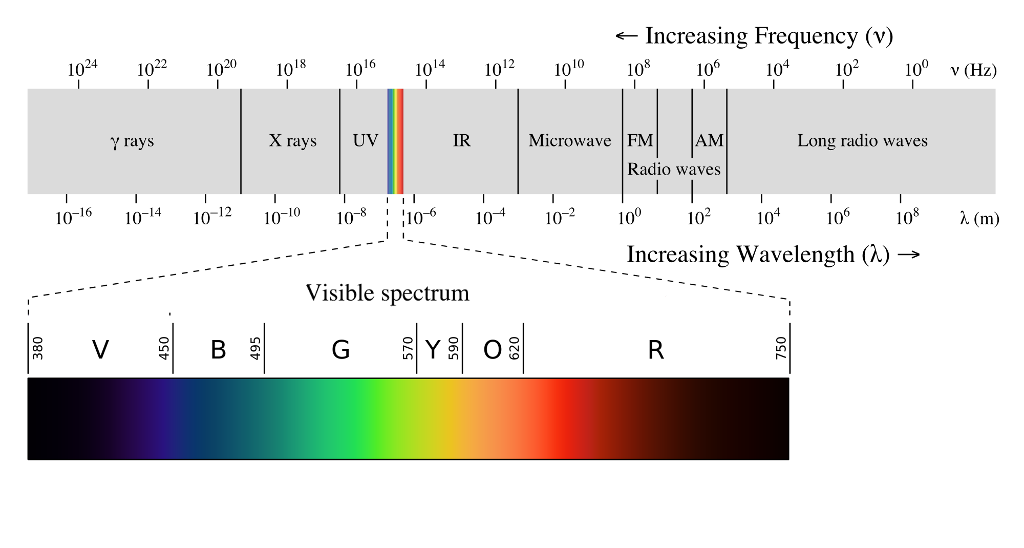

The typical consumer camera will have filters before the sensors that takes the continuous spectrum and breaks it into red reflectance (R), green reflectance (G), and blue reflectance (B). These grouping of reflectance are called **bands** in remote sensing terminology. The more light reflected off the objects from the "red" part of the spectrum, the more light will be hitting the red sensor in the camera, and the brighter the red pixels will be in the resulting image. The end result is that an image from your camera consists of 3 bands of information, R, G, and B. When combined these three bands "mix" to create a color. For example, white pixels in a color image have high values in all three bands. 

If you have ever used GIMP, Photoshop, or ACDSee to look at your photos, you can play around with these 3 bands. When you look at just 1 band of information it is usually just greyscale with pixels values typically ranging from 1 to 255. A value of 1 means very little reflectance in that band while 255 means the maximum reflectance. 

This is, of course, a huge simplification of how the camera works but it is enough for our purposes.

Satellite sensors are similar to those digital camera sensors except there are some crucial differences:

1. Satellites usually capture more than 3 bands of reflectance. They have sensors ofr the normal red, green, and blue bands so we can see a "normal" colored image, and they usually also collect several bands in the infrared region of the spectrum. For example, DigitalGlobe's WorldView-4 (WV4) Satellite captures [5 bands of information](https://dg-cms-uploads-production.s3.amazonaws.com/uploads/document/file/196/DG2017_WorldView-4_DS.pdf)
    1. a panchromatic band which captures reflectance over a large swadth of the spectrum
    2. a red band
    3. a green band
    4. a blue band
    5. a near-infrared band
    
    all of these bands are available when you get an "image" from the satellite. Our WorldView-3 satellite provides 16 bands of information. The relationship between all these bands will become very important when we start doing analysis
2. The satellite has an amazing "telephoto" lens. The WV4 panchromatic band has a ground resolution of 30cm. This means one pixel represents 30cm on the ground, enough to pick up a traffic cone or street light. If you took your iPhone or Android phone and took a picture from the same elevation as the satellite, each pixel would be about 40,000cm on the ground, allowing you to barely pick out an aircraft carrier. 
3. The satellite can stay extremely focused on it's subject. While traveling in orbit, the satellite is moving at 27,000km (17,000 miles) per hour – fast enough to get you from London to Paris in under a minute - but the image is not blurred.
4. The satellite also knows exactly where it is pointed on the earth. For WV4, the location of the image captured to within approximately 5 meters of its true position. That amazing accuracy is without any manual correction. 

In the end, you can think of the satellite images as really advanced geo-located digital camera images that contain massive amounts of data about the surface of the earth.


## [Understanding Some Terminology](#terminology)

**READING THIS IS IMPORTANT TO UNDERSTANDING THE REST OF DIGITALGLOBE DOCUMENTATION**

After that quick introduction to remote sensed images (eventhough it may not have felt that way) we still need to cover a few more terms that relate to satellite imagery. 

1. **Area of Interest (AOI)** - this is the area you are interested in viewing or analyzing. It is usually defined by a rectangle but can be any geometry. Sometimes called a bounding box (bbox) or a bounding geometry.
2. **Scene or Image Strip** - this is the image that is actually sent down from the satellite. It is called a strip because it usually comes out as a rectangle with a long length and relatively narrow width. For example a WV4 scene can be 360km long and 13.1km wide. The dimensions of this can vary depending on the collection mode used on the satellite. The important part to remember is that this is the image that comes out of the satellite.
4. **Image** - this is a very overloaded term, meaning it can be used in many different ways. The primary way you see it used in the GBDX documentation is referring to a piece of a scene that has been extracted using an AOI. For example, an image strip may cover from the north coast of France to well past Paris, but your AOI may be the neigborhood around the Eiffel Tower. You would use your AOI to define a subset of the scene to extract into a new image. If you find a place where we use *image* and it is confusing please give us feedback through the blue tab on the middle right hand of your browser window.
5. **Chip** - This is another term we use to refer to an image extracted from a scene - making it analogous to the use of Image above. However chips are usually small in size and often contain a distinct feature. An example would be when using machine learning to find airplanes in an image. The process would generate a chip for every airplane found.




## Finally, Loading Satellite Imagery
DigitalGlobe's archive of satellite imagery spans the whole world over many years. So unlike looking at something like Google Maps or other mapping sites, there are usually multiple images available for the area you are analyzing.  Therefore, our first step will usually be to find all available image strips that cover our AOI and then select an image to work with. 

## Using the Imagery Tab to Load an Image

The easiest way to browse and select these images is to use the Imagery Tab found on the top left side of your notebook.

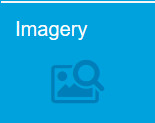

Click the 'Imagery' button on the left of a notebook.

You will now see a map appear on the left. We will use this map to locate and then define our AOI.

### Imagery Search Interface

Let's walk through the pieces of the interface below:

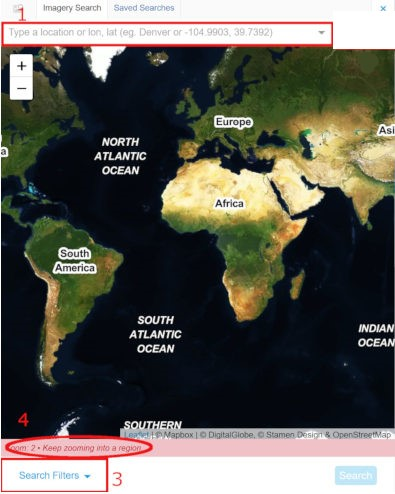

**Red Number 1** - You can enter the name of a place near your AOI into the search box. You can also enter a longitude and latitude instead. If you want to follow exacty with these exercises we are going to search for *"Pueblo, Colorado"*

**Red Number 3** - If you click on *"search filters"* additional criteria will come up that you can use to filter your search results. Examples of filters include percentage of cloud cover and date of image acquisition. We are not going to use these now.

**Red Number 4** - Finally, there is a status bar where the number indicates the zoom level (zooming in increases the number) and whether you can draw an AOI. **Please note that none of the AOI selection tools will appear until you zoom in to at least level 11.** 

### Picking our AOI

1. Go ahead and search on *"Pueblo, CO"* which should return Pueblo, Colorado, United States

2. You will notice below the zoom in and zoom out buttons there is now a button with a rectangle with a plus symbol
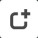

3. Click the symbol and then drag a box that looks similar to the picture below.
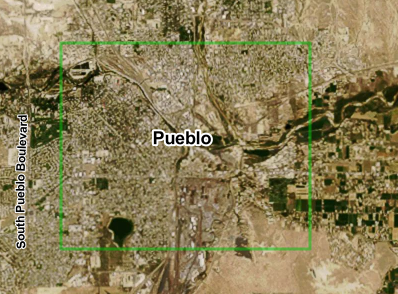

Hit the blue 'Search' button on the bottom right to find imagery in our AOI.

A list of available images will appear. Scroll down the list until you get to the image from 8/27/2018 with 0% cloud cover.

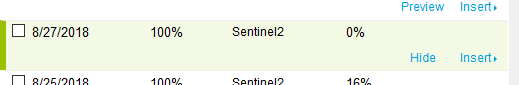

If you click the "Insert" link, you'll get something like the following inserted into your notebook:

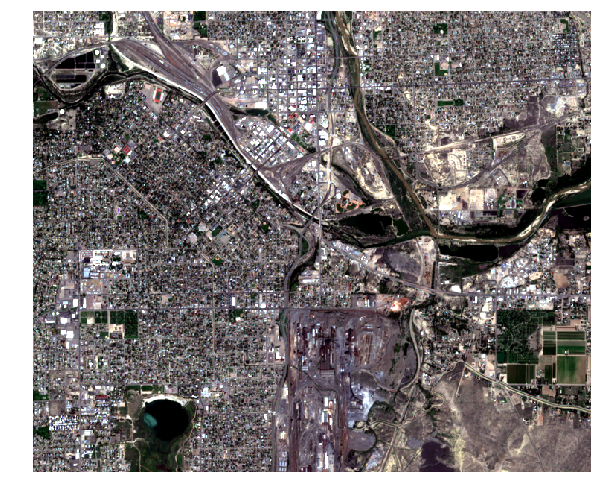

In [1]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '24a34529-7701-584c-89bf-bf1686d681f6')
bbox = env.inputs.get('bbox', '-104.65061187744142, 38.224426107530235, -104.56512451171876, 38.279965561875926')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

## Using Code to Load an Image

The code inserted from the search interface is the same code you would write to work with an image. It also adds a view of the image to the notebook using the .plot() method.  

### Quick Explanation of the Inserted Code

Let's quickly give an overview of the lines of code. 

* Lines 1 and 2 import two different classes we will need to retrieve and manipulate imagery.
* Line 4 is making an object that is holding the *catalogid* for a scene (image strip). The *catalogid* is the unque identifier for a strip.
* Line 5 creates bounding box (bbox) object for the area within the scene that we want to extract. This bbox matches the rectangle we drew on the screen. The *catalogid* and *bbox* are wrapped in `env.inputs.get()` for future use in the GBDX [tasking framework](https://gbdxdocs.digitalglobe.com/docs/task-and-workflow-course)
* Line 7 is where a lot of the action is really happening. This line takes our *catalogid* and our *bbox* along with the bands we want and returns an image we can work with. Under the hoods, this call goes out to DigitalGlobes GBDX API to retrieve the image
* Line 8 displays the image in your notebook. The plot method uses Matplotlib to generate the image. In Matplotlib, the plot size is defined in units of inches at 72 pixels per inch. So a width and height of 10 means 10 inches at 72 pixels per inch, or 720 pixels total. This size includes margins and any annotations, if used

For the people who like to read API documentation (such as your gentle author) - here is the [API documentation for GBDXTools](http://gbdxtools.readthedocs.io/en/latest/api_reference.html#). If you dig in there you can read more about the parameters of the methods and what they do.  


## Next Steps

Now that we know how to load an image, the next tutorial will cover the capabilities of the satellites available through GBDX Notebooks. 

[Let's get going](https://notebooks.geobigdata.io/hub/notebooks/5ba9af38e9c92b5d7a00ef0f)